**OBJECTIVE** : 
             The objective of this project is to develop a machine learning model that can predict the fare amount of a taxi ride based on key          ride features such as pickup and dropoff location, date and time, and passenger count.

# Imports

In [191]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression 
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score 
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV

import warnings
warnings.filterwarnings("ignore")

# Load Dataset

In [192]:
# Train Dataset
train = pd.read_csv("train_cab_fare.csv.zip")

# Test Dataset
test = pd.read_csv("test_cab_fare.csv")

# Basic Understanding

**Train Data**

In [193]:
train.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0


In [194]:
train.shape

(16067, 7)

In [195]:
train.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,16067.000000,16067.000000,16067.000000,16067.000000,16012.000000
mean,-72.462787,39.914725,-72.462328,39.897906,2.625070
std,10.578384,6.826587,10.575062,6.187087,60.844122
min,-74.438233,-74.006893,-74.429332,-74.006377,0.000000
25%,-73.992156,40.734927,-73.991182,40.734651,1.000000
50%,-73.981698,40.752603,-73.980172,40.753567,1.000000
75%,-73.966838,40.767381,-73.963642,40.768014,2.000000
max,40.766125,401.083332,40.802437,41.366138,5345.000000


In [196]:
train.dtypes

fare_amount           object
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
dtype: object

**Test Data**

In [197]:
test.shape

(9914, 6)

In [198]:
test.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974722,40.751041,-73.973657,40.751743,1.671273
std,0.042774,0.033541,0.039072,0.035435,1.278747
min,-74.252193,40.573143,-74.263242,40.568973,1.000000
25%,-73.992501,40.736125,-73.991247,40.735254,1.000000
50%,-73.982326,40.753051,-73.980015,40.754065,1.000000
75%,-73.968013,40.767113,-73.964059,40.768757,2.000000
max,-72.986532,41.709555,-72.990963,41.696683,6.000000


In [199]:
test.dtypes

pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

# Data Cleaning And Missing Value Analysis

**Clean Train data**

In [200]:
# Convert fare_amount from object to numeric
# Using errors=’coerce’. It will replace all non-numeric values with NaN

train["fare_amount"] = pd.to_numeric(train["fare_amount"],errors = "coerce")  

In [201]:
train.shape

(16067, 7)

In [202]:
train.dtypes

fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
dtype: object

In [203]:
train.dropna(subset=["pickup_datetime"])

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0
...,...,...,...,...,...,...,...
16062,6.5,2014-12-12 07:41:00 UTC,-74.008820,40.718757,-73.998865,40.719987,1.0
16063,16.1,2009-07-13 07:58:00 UTC,-73.981310,40.781695,-74.014392,40.715527,2.0
16064,8.5,2009-11-11 11:19:07 UTC,-73.972507,40.753417,-73.979577,40.765495,1.0
16065,8.1,2010-05-11 23:53:00 UTC,-73.957027,40.765945,-73.981983,40.779560,1.0


In [204]:
train['pickup_datetime'] = pd.to_datetime(train['pickup_datetime'], errors='coerce', utc=True)

In [205]:
# Separately extract feature

train["Year"] = train["pickup_datetime"].dt.year
train["Month"] = train["pickup_datetime"].dt.month
train["Date"] = train["pickup_datetime"].dt.date

train["Day"] = train["pickup_datetime"].dt.day
train["Hour"] = train["pickup_datetime"].dt.hour
train["Minute"] = train["pickup_datetime"].dt.minute

In [206]:
# Re-check Train data type after conversion

train.dtypes

fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                  float64
Year                             float64
Month                            float64
Date                              object
Day                              float64
Hour                             float64
Minute                           float64
dtype: object

**Clean Test data**

In [207]:
test['pickup_datetime'] = pd.to_datetime(test['pickup_datetime'], errors='coerce', utc=True)

In [208]:
# Separately extract feature

test["Year"] = test["pickup_datetime"].dt.year
test["Month"] = test["pickup_datetime"].dt.month
test["Date"] = test["pickup_datetime"].dt.date

test["Day"] = test["pickup_datetime"].dt.day
test["Hour"] = test["pickup_datetime"].dt.hour
test["Minute"] = test["pickup_datetime"].dt.minute

In [209]:
# Re-check Test data type after conversion

test.dtypes

pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
Year                               int32
Month                              int32
Date                              object
Day                                int32
Hour                               int32
Minute                             int32
dtype: object

**Pickup_Datetime**

In [210]:
# Removing pickup_datetime missing values rows

train = train.drop(train[train['pickup_datetime'].isnull()].index, axis=0)
print(train.shape)
print(train['pickup_datetime'].isnull().sum())

(16066, 13)
0


**Passenger_Count**

In [211]:
train['passenger_count'].describe()

count    16011.000000
mean         2.625171
std         60.846021
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max       5345.000000
Name: passenger_count, dtype: float64

In [212]:
# Removing the passenger count having count>6

train = train.drop(train[train["passenger_count"]> 6 ].index, axis=0)

In [213]:
# Removing the values with passenger count of 0

train = train.drop(train[train["passenger_count"] == 0 ].index, axis=0)

In [214]:
# Re-check

train["passenger_count"].describe()

count    15934.000000
mean         1.649581
std          1.265943
min          0.120000
25%          1.000000
50%          1.000000
75%          2.000000
max          6.000000
Name: passenger_count, dtype: float64

In [215]:
train["passenger_count"].sort_values(ascending=True)

8862     0.12
16048    1.00
22       1.00
21       1.00
20       1.00
         ... 
8076      NaN
8139      NaN
8259      NaN
8306      NaN
16066     NaN
Name: passenger_count, Length: 15989, dtype: float64

In [216]:
# Removing passenger_count missing values rows

train = train.drop(train[train['passenger_count'].isnull()].index, axis=0)
print(train.shape)
print(train['passenger_count'].isnull().sum())

(15934, 13)
0


In [217]:
# There is one passenger count value of 0.12 which is not possible. 
# Hence we will remove fractional passenger value

train = train.drop(train[train['passenger_count'] == 0.12].index, axis=0)

In [218]:
train.shape

(15933, 13)

**Fare_Amount**

In [219]:
# Finding decending order of fare_amount to get to know whether the outliers are present or not

train["fare_amount"].sort_values(ascending=False)

1015    54343.0
1072     4343.0
607       453.0
980       434.0
1335      180.0
         ...   
1712        NaN
2412        NaN
2458        NaN
8178        NaN
8226        NaN
Name: fare_amount, Length: 15933, dtype: float64

In [220]:
# Fare amount has a negative value, which doesn't make sense. 

Counter(train["fare_amount"] < 0)

Counter({False: 15930, True: 3})

In [221]:
# Remove those fields which has -ve values

train = train.drop(train[train['fare_amount'] < 0].index, axis=0)
print(train.shape)

(15930, 13)


In [222]:
# Make sure there is no negative values in the fare_amount variable column

train["fare_amount"].min()

0.0

In [223]:
# Remove the row where fare amount is zero

train = train.drop(train[train['fare_amount'] < 1].index,axis=0)
train.shape

(15928, 13)

In [224]:
# Fare amount variable in descending order

train["fare_amount"].sort_values(ascending=False)

1015    54343.0
1072     4343.0
607       453.0
980       434.0
1335      180.0
         ...   
1712        NaN
2412        NaN
2458        NaN
8178        NaN
8226        NaN
Name: fare_amount, Length: 15928, dtype: float64

In [225]:
# Removing the missing value rows

train = train.drop(train[train["fare_amount"].isnull()].index, axis=0)
train.shape

(15904, 13)

In [226]:
# Removing the outlier 

train = train.drop(train[train["fare_amount"] > 453].index, axis=0)
train.shape


(15902, 13)

In [227]:
# Fare_amount variable in descending order

train['fare_amount'].sort_values(ascending=False)

607     453.00
980     434.00
1335    180.00
1483    165.00
6630    128.83
         ...  
4367      2.50
6297      2.50
3558      2.50
6226      2.50
1427      1.14
Name: fare_amount, Length: 15902, dtype: float64

In [228]:
train['fare_amount'].describe()

count    15902.000000
mean        11.376356
std         10.814908
min          1.140000
25%          6.000000
50%          8.500000
75%         12.500000
max        453.000000
Name: fare_amount, dtype: float64

**Pickup and Dropoff Latitude/Longitude**

In [229]:
# Filter pickup latitude between 40.5 and 41.0
train = train[(train['pickup_latitude'] >= 40.5) & (train['pickup_latitude'] <= 41.0)]

# Filter pickup longitude between -74.3 and -73.5
train = train[(train['pickup_longitude'] >= -74.3) & (train['pickup_longitude'] <= -73.5)]


In [230]:
train['pickup_latitude'].sort_values(ascending=False)

3394     40.956018
4004     40.876747
12934    40.876620
11366    40.866375
4313     40.865160
           ...    
4800     40.614803
11964    40.609495
11859    40.604462
12940    40.572183
13736    40.571310
Name: pickup_latitude, Length: 15560, dtype: float64

In [231]:
train['pickup_longitude'].sort_values(ascending=False)

12915   -73.652179
13175   -73.688170
7908    -73.725993
4086    -73.776293
15366   -73.776343
           ...    
7635    -74.102257
1494    -74.105395
9090    -74.133710
10524   -74.181602
12940   -74.229138
Name: pickup_longitude, Length: 15560, dtype: float64

In [232]:
# Filter pickup latitude between 40.5 and 41.0
train = train[(train['dropoff_latitude'] >= 40.5) & (train['dropoff_latitude'] <= 41.0)]

# Filter pickup longitude between -74.3 and -73.5
train = train[(train['dropoff_longitude'] >= -74.3) & (train['dropoff_longitude'] <= -73.5)]


In [233]:
train['dropoff_latitude'].sort_values(ascending=False)

3394     40.954298
4118     40.921800
7769     40.911461
7021     40.905170
15207    40.904590
           ...    
8552     40.574729
12398    40.574652
4291     40.551710
10000    40.550097
13736    40.543870
Name: dropoff_latitude, Length: 15541, dtype: float64

In [234]:
train['dropoff_latitude'].sort_values(ascending=False)

3394     40.954298
4118     40.921800
7769     40.911461
7021     40.905170
15207    40.904590
           ...    
8552     40.574729
12398    40.574652
4291     40.551710
10000    40.550097
13736    40.543870
Name: dropoff_latitude, Length: 15541, dtype: float64

In [235]:
train.shape

(15541, 13)

In [236]:
# Check null value for Train data

train.isnull().sum()


# Check null value for Test data

test.isnull().sum()

pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
Year                 0
Month                0
Date                 0
Day                  0
Hour                 0
Minute               0
dtype: int64

**Calculate Distance**

In [237]:
# # To Calculate Distance we use Haversine Formula 

from math import radians, cos, sin, asin, sqrt
def haversine(a):
      lon1=a[0]
      lat1=a[1]
      lon2=a[2]
      lat2=a[3]
    
# Convert decimal degrees to radians 
      lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

# Haversine Formula 
      dlon = lon2 - lon1 
      dlat = lat2 - lat1 
      a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
      c =  2 * asin(sqrt(a))

# Radius of earth in kilometers is 6371
      km = 6371* c
      return km
    

In [238]:
# Distance (Train)

train["distance"] = train[["pickup_longitude","pickup_latitude","dropoff_longitude","dropoff_latitude"]].apply(haversine, axis=1)

In [239]:
train.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Date,Day,Hour,Minute,distance
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1.0,2009.0,6.0,2009-06-15,15.0,17.0,26.0,1.030764
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1.0,2010.0,1.0,2010-01-05,5.0,16.0,52.0,8.450134
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2.0,2011.0,8.0,2011-08-18,18.0,0.0,35.0,1.389525
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1.0,2012.0,4.0,2012-04-21,21.0,4.0,30.0,2.799270
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1.0,2010.0,3.0,2010-03-09,9.0,7.0,51.0,1.999157


In [240]:
# Distance (Test)

test["distance"] = test[["pickup_longitude","pickup_latitude","dropoff_longitude","dropoff_latitude"]].apply(haversine, axis=1)

In [241]:
test.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Date,Day,Hour,Minute,distance
0,2015-01-27 13:08:24+00:00,-73.973320,40.763805,-73.981430,40.743835,1,2015,1,2015-01-27,27,13,8,2.323259
1,2015-01-27 13:08:24+00:00,-73.986862,40.719383,-73.998886,40.739201,1,2015,1,2015-01-27,27,13,8,2.425353
2,2011-10-08 11:53:44+00:00,-73.982524,40.751260,-73.979654,40.746139,1,2011,10,2011-10-08,8,11,53,0.618628
3,2012-12-01 21:12:12+00:00,-73.981160,40.767807,-73.990448,40.751635,1,2012,12,2012-12-01,1,21,12,1.961033
4,2012-12-01 21:12:12+00:00,-73.966046,40.789775,-73.988565,40.744427,1,2012,12,2012-12-01,1,21,12,5.387301


In [242]:
# Finding decending order of distance to get to know whether the outliers are presented or not.

train['distance'].sort_values(ascending=False)

4118     32.602535
7021     29.478280
6677     26.369072
8105     24.690884
15023    24.125745
           ...    
4086      0.000000
5449      0.000000
5452      0.000000
11437     0.000000
15524     0.000000
Name: distance, Length: 15541, dtype: float64

In [243]:
Counter(train['distance'] == 0)

Counter({False: 15393, True: 148})

In [244]:
Counter(test['distance'] == 0)

Counter({False: 9829, True: 85})

In [245]:
# We will remove the rows whose distance value is zero

train = train.drop(train[train['distance'] == 0].index, axis=0)
train.shape

(15393, 14)

In [246]:
# We will remove the rows whose distance values is very high, which is more than 129kms.

train = train.drop(train[train['distance'] > 130 ].index, axis=0)
train.shape

(15393, 14)

In [247]:
train.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Date,Day,Hour,Minute,distance
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1.0,2009.0,6.0,2009-06-15,15.0,17.0,26.0,1.030764
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1.0,2010.0,1.0,2010-01-05,5.0,16.0,52.0,8.450134
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2.0,2011.0,8.0,2011-08-18,18.0,0.0,35.0,1.389525
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1.0,2012.0,4.0,2012-04-21,21.0,4.0,30.0,2.799270
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1.0,2010.0,3.0,2010-03-09,9.0,7.0,51.0,1.999157


In [248]:
# Drop (Train) Dataset Columns

drop1 = ['pickup_datetime', 'pickup_longitude', 'pickup_latitude','dropoff_longitude', 'dropoff_latitude', 'Minute']

train = train.drop(drop1, axis = 1, errors='ignore')

In [249]:
train.head()

,fare_amount,passenger_count,Year,Month,Date,Day,Hour,distance
0,4.5,1.0,2009.0,6.0,2009-06-15,15.0,17.0,1.030764
1,16.9,1.0,2010.0,1.0,2010-01-05,5.0,16.0,8.450134
2,5.7,2.0,2011.0,8.0,2011-08-18,18.0,0.0,1.389525
3,7.7,1.0,2012.0,4.0,2012-04-21,21.0,4.0,2.799270
4,5.3,1.0,2010.0,3.0,2010-03-09,9.0,7.0,1.999157


In [250]:
train['Date'] = pd.to_datetime(train['Date'])
train['Date'] = train['Date'].dt.strftime('%Y%m%d').astype(int)

In [251]:
train['passenger_count'] = train['passenger_count'].astype('int64')
train['Year'] = train['Year'].astype('int64')
train['Month'] = train['Month'].astype('int64')
train['Date'] = train['Date'].astype('int64')
train['Day'] = train['Day'].astype('int64')
train['Hour'] = train['Hour'].astype('int64')

In [252]:
train.dtypes

fare_amount        float64
passenger_count      int64
Year                 int64
Month                int64
Date                 int64
Day                  int64
Hour                 int64
distance           float64
dtype: object

In [253]:
# Remove (Test) Dataset Columns

drop2 = ['pickup_datetime', 'pickup_longitude', 'pickup_latitude','dropoff_longitude', 'dropoff_latitude', 'Minute']

test = test.drop(drop2, axis = 1)

In [254]:
test.head()

,passenger_count,Year,Month,Date,Day,Hour,distance
0,1,2015,1,2015-01-27,27,13,2.323259
1,1,2015,1,2015-01-27,27,13,2.425353
2,1,2011,10,2011-10-08,8,11,0.618628
3,1,2012,12,2012-12-01,1,21,1.961033
4,1,2012,12,2012-12-01,1,21,5.387301


In [255]:
test['Date'] = pd.to_datetime(test['Date'])
test['Date'] = test['Date'].dt.strftime('%Y%m%d').astype(int)

In [256]:
test['passenger_count'] = test['passenger_count'].astype('int64')
test['Year'] = test['Year'].astype('int64')
test['Month'] = test['Month'].astype('int64')
test['Date'] = test['Date'].astype('int64')
test['Day'] = test['Day'].astype('int64')
test['Hour'] = test['Hour'].astype('int64')

In [257]:
test.dtypes

passenger_count      int64
Year                 int64
Month                int64
Date                 int64
Day                  int64
Hour                 int64
distance           float64
dtype: object

# Exploratory Data Analysis

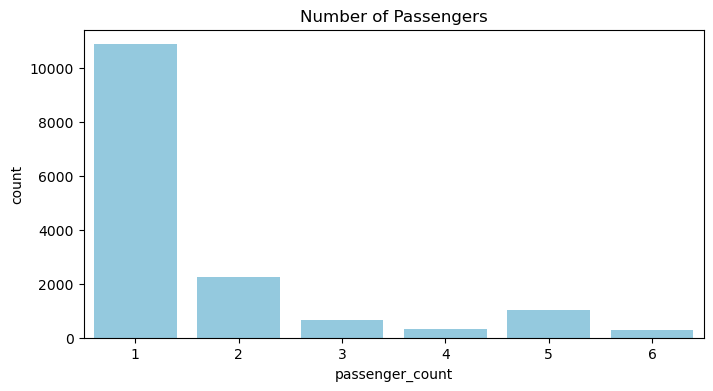

In [258]:
plt.figure(figsize=(8,4))

sns.countplot(x="passenger_count", data=train, color='skyblue')

plt.title("Number of Passengers")

plt.show()

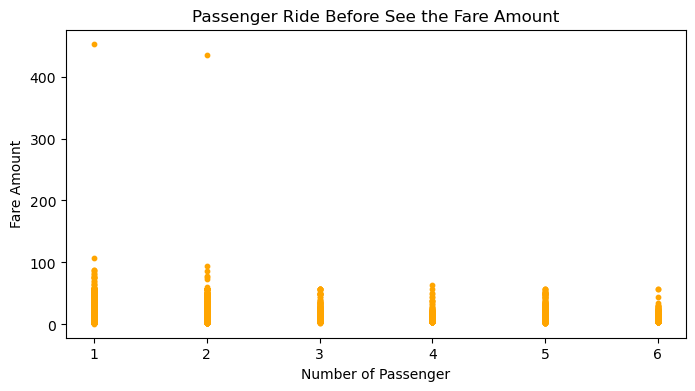

In [259]:
plt.figure(figsize=(8,4))
plt.scatter(x=train['passenger_count'], y=train['fare_amount'], s=10, color='orange')

plt.title("Passenger Ride Before See the Fare Amount")

plt.xlabel("Number of Passenger")
plt.ylabel("Fare Amount")

plt.show()

**OBSERVATIONS**

--> By seeing the above plots we can easily conclude that:

* Single travelling passengers are most frequent travellers.
* At the sametime, we can also conclude that highest Fare are coming from single & double travelling passengers.

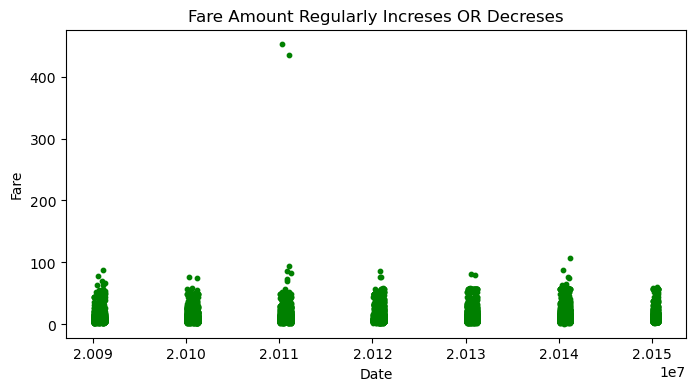

In [260]:
plt.figure(figsize=(8,4))
plt.scatter(x=train['Date'], y=train['fare_amount'], s=10, color='green')

plt.title("Fare Amount Regularly Increses OR Decreses")

plt.xlabel("Date")
plt.ylabel("Fare")

plt.show()

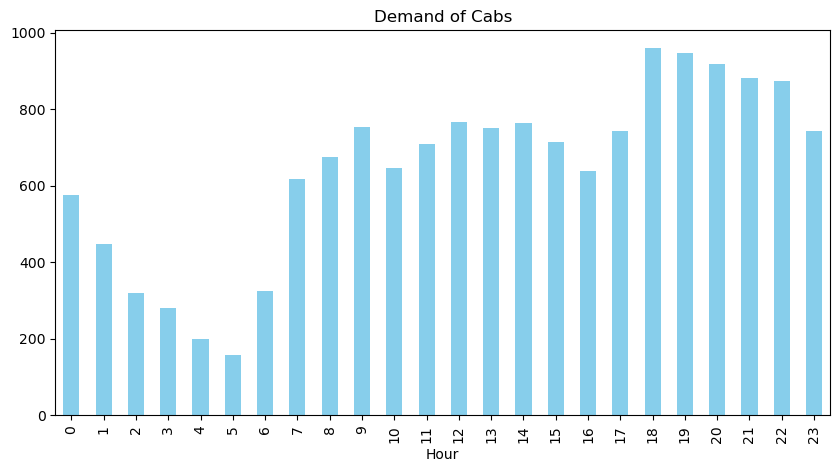

In [261]:
plt.figure(figsize=(10,5))

train.groupby(train["Hour"])['Hour'].count().plot(kind="bar", color='skyblue')

plt.title("Demand of Cabs")

plt.show()

**OBSERVATIONS**

* Lowest cabs at 5 AM and highest at around 7 PM i.e the office rush hours.

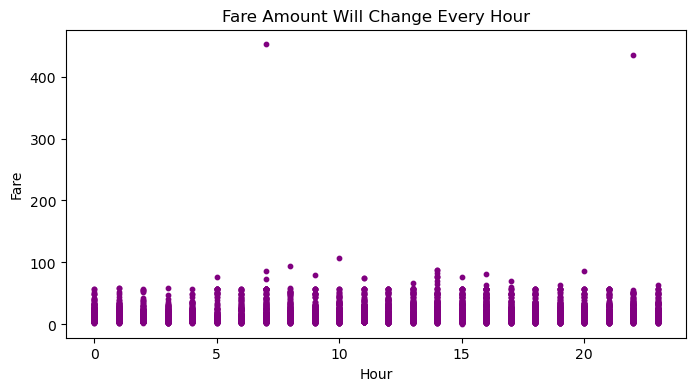

In [262]:
plt.figure(figsize=(8,4))
plt.scatter(x=train['Hour'], y=train['fare_amount'], s=10, color='purple')

plt.title("Fare Amount Will Change Every Hour")

plt.xlabel("Hour")
plt.ylabel("Fare")

plt.show()

**OBSERVATIONS**

* From the above plot, We can observe that the cabs taken at 7 am and 23(11 Pm) are the costliest.
* Hence we can assume that cabs taken early in morning and late at night are costliest

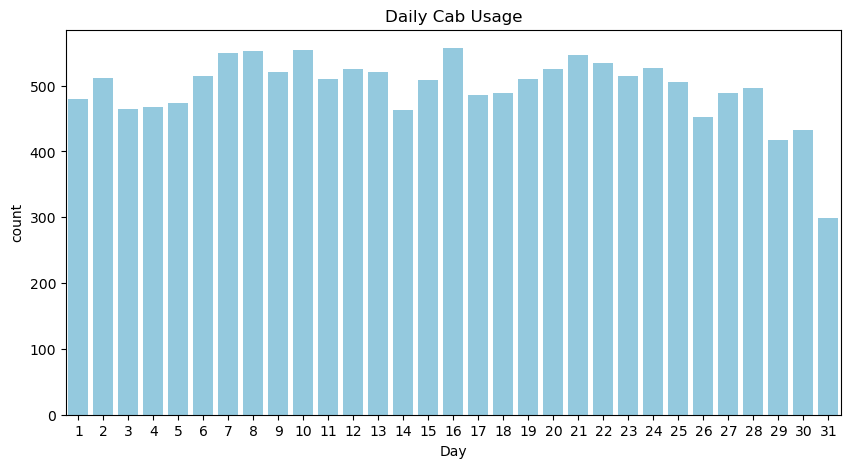

In [264]:
plt.figure(figsize=(10,5))
sns.countplot(x="Day", data=train, color='skyblue')

plt.title("Daily Cab Usage")

plt.show()

**OBSERVATIONS**

* The day of the week does not seem to have much influence on the number of cabs ride.

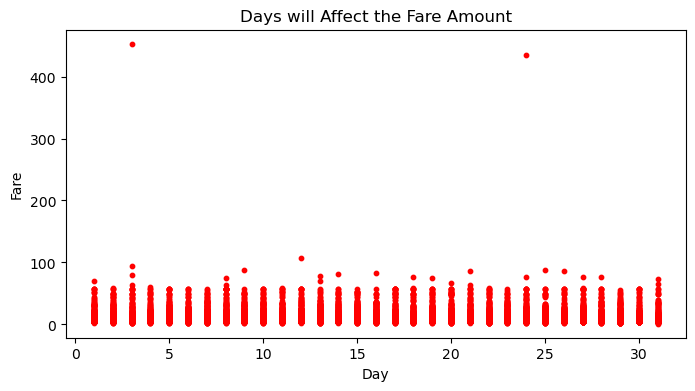

In [265]:
plt.figure(figsize=(8,4))
plt.scatter(x=train['Day'], y=train['fare_amount'], s=10, color='red')

plt.title("Days will Affect the Fare Amount")

plt.xlabel("Day")
plt.ylabel("Fare")

plt.show()

**OBSERVATIONS**

* The highest fare seem to be on a Sunday, Monday, Tuesday, Wednesday and the low on Friday and Saturday.
* May be due to low demand of the cabs on saturdays the cab fare is low and high demand of cabs on sunday and monday shows the high fare prices.

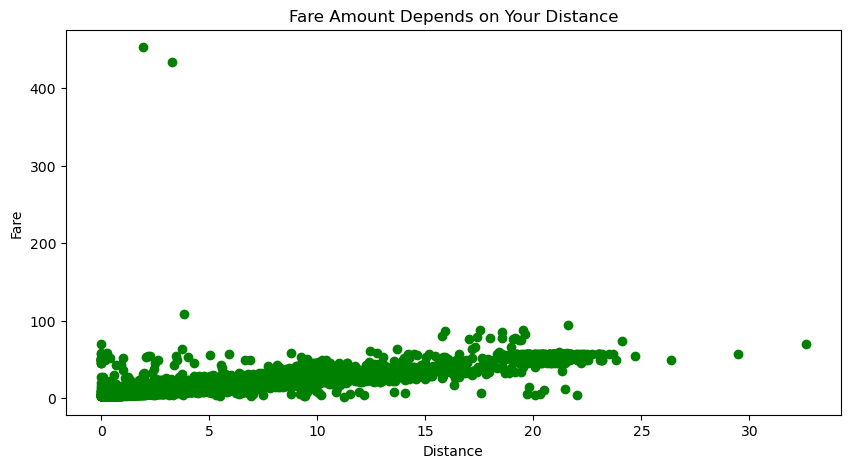

In [266]:
plt.figure(figsize=(10,5))
plt.scatter(x = train['distance'],y = train['fare_amount'],c = "g")

plt.title("Fare Amount Depends on Your Distance")

plt.xlabel("Distance")
plt.ylabel("Fare")

plt.show()

# Feature Scaling

**Train data**

fare_amount


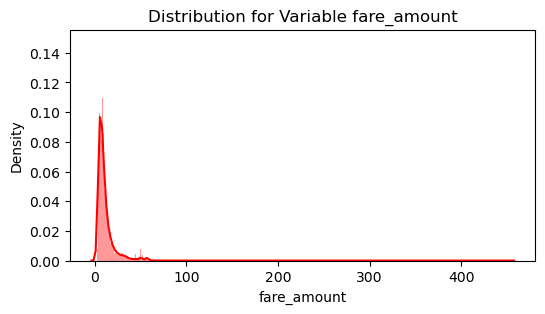

distance


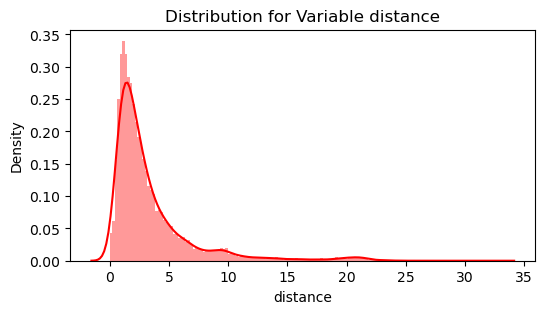

In [267]:
for i in ['fare_amount', 'distance']:
    print(i) 

    plt.figure(figsize=(6,3))
    
    sns.distplot(train[i],bins='auto',color='red')
    
    plt.title("Distribution for Variable "+i)
    
    plt.ylabel("Density")
    plt.show()

In [268]:
# Since Skewness of Fare Amount is High, Apply Log Transform To Reduce The Skewness

train['fare_amount'] = np.log1p(train['fare_amount'])

In [269]:
# Since Skewness of Distance Variable is High, Apply Log Transform To Reduce The Skewness

train['distance'] = np.log1p(train['distance'])

fare_amount


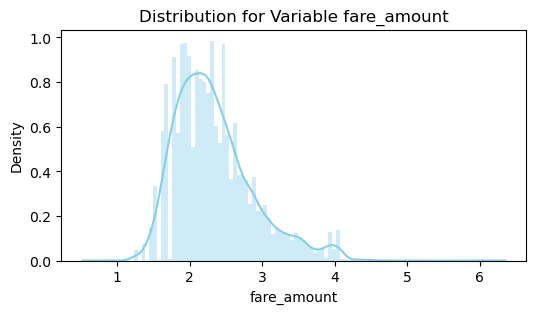

distance


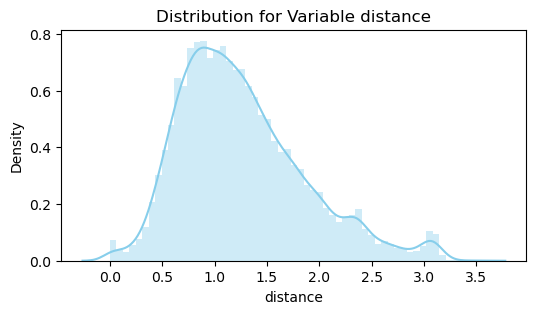

In [270]:
# Normality To Check Data is Uniformly Distributed OR Not After Log Transformation

for i in ['fare_amount', 'distance']:
    print(i)

    plt.figure(figsize=(6,3))
    sns.distplot(train[i],bins='auto',color='skyblue')
    
    plt.title("Distribution for Variable "+i)
    
    plt.ylabel("Density")
    plt.show()

**Test data**

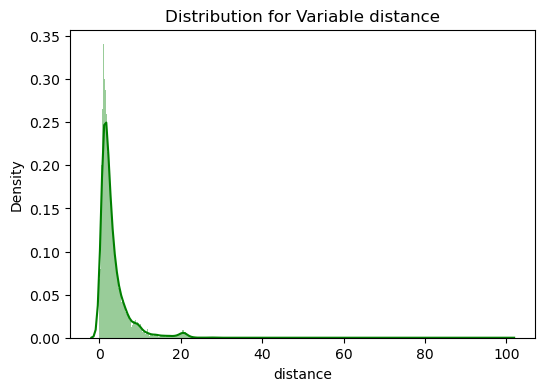

In [271]:
# Normality Check For Test Data Is Uniformly Distributed OR Not

plt.figure(figsize=(6,4))

sns.distplot(test['distance'],bins='auto',color='green')

plt.title("Distribution for Variable "+i)

plt.ylabel("Density")
plt.show()

In [272]:
# Since skewness of distance variable is high, apply log transform to reduce the skewness

test['distance'] = np.log1p(test['distance'])

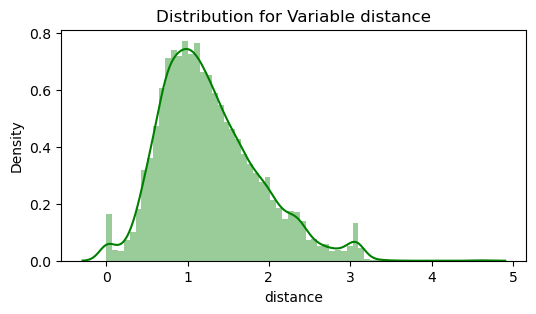

In [273]:
# Rechecking the distribution for distance

plt.figure(figsize=(6,3))

sns.distplot(test['distance'],bins='auto',color='green')

plt.title("Distribution for Variable "+i)

plt.ylabel("Density")
plt.show()

In [274]:
test1= test.copy()

# ML Model

In [275]:
# Further model for train test split

x_train, x_test, y_train, y_test = train_test_split( train.iloc[:, train.columns != 'fare_amount'], 
                         train.iloc[:, 0], test_size = 0.20, random_state = 1)

In [276]:
print(x_train.shape)

(12314, 7)


In [277]:
print(x_test.shape)

(3079, 7)


**Linear Regression Model**

In [278]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [279]:
# Predict on Train data
y_pred_train = model.predict(x_train)

# Compute RMSE
RMSE_train_LR = np.sqrt(mean_squared_error(y_train, y_pred_train))
print("Root Mean Squared Error for Train data = " + str(RMSE_train_LR))

# Calculate R² score
R2_train_LR = r2_score(y_train, y_pred_train)
print("R² score for Train data = ", R2_train_LR)

Root Mean Squared Error for Train data = 0.2574863274165948
R² score for Train data =  0.777055946176191


In [280]:
# Predict on Test data
y_pred_test = model.predict(x_test)

# Compute RMSE
RMSE_test_LR = np.sqrt(mean_squared_error(y_test, y_pred_test))
print("Root Mean Squared Error for Test data = " + str(RMSE_test_LR))

# Calculate R² score
R2_test_LR = r2_score(y_test, y_pred_test)
print("R² score for Test data = ", R2_test_LR)

Root Mean Squared Error for Test data = 0.24635441508894804
R² score for Test data =  0.7915949185124902


**Decision Tree Model**

In [93]:
model = DecisionTreeRegressor(max_depth=2)
model.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=2)

In [94]:
# Predict on Train data
y_pred_train = model.predict(x_train)

# Compute RMSE
RMSE_train_DT = np.sqrt(mean_squared_error(y_train, y_pred_train))
print("Root Mean Squared Error for Train data = " + str(RMSE_train_DT))

# Compute R² score
print("R²_score for Train data = ", r2_score(y_train, y_pred_train))

Root Mean Squared Error for Train data = 0.29407567706468896
R²_score for Train data =  0.7091923953523228


In [95]:
# Predict on Test data
y_pred_test = model.predict(x_test)

# Compute RMSE
RMSE_test_DT = np.sqrt(mean_squared_error(y_test, y_pred_test))
print("Root Mean Squared Error for Test Data = " + str(RMSE_test_DT))

# Compute R² score
print("R²_score for Test data = ", r2_score(y_test, y_pred_test))

Root Mean Squared Error for Test Data = 0.2839940988990528
R²_score for Test data =  0.7230468965948199


**Random Forest Model**

In [96]:
model = RandomForestRegressor(n_estimators=200)
model.fit(x_train, y_train)

RandomForestRegressor(n_estimators=200)

In [97]:
# Predict on Train data
y_pred_train = model.predict(x_train)

# Compute RMSE
RMSE_train_RF = np.sqrt(mean_squared_error(y_train, y_pred_train))
print("Root Mean Squared Error for Train Data = " + str(RMSE_train_RF))

# Compute R² score
print("R²_score for Train Data = ", r2_score(y_train, y_pred_train))

Root Mean Squared Error for Train Data = 0.09396696966159591
R²_score for Train Data =  0.9703080998738977


In [319]:
# Predict on Test data
y_pred_test = model.predict(x_test)

# Compute RMSE
RMSE_test_RF = np.sqrt(mean_squared_error(y_test, y_pred_test))
print("Root Mean Squared Error for Test Data = " + str(RMSE_test_RF))

# Compute R² score
print("R²_score for Test data = ", r2_score(y_test, y_pred_test))

Root Mean Squared Error for Test Data = 0.24546756247420584
R²_score for Test data =  0.793092694924122


**Gradient Boosting Model**

In [98]:
model = GradientBoostingRegressor()
model.fit(x_train, y_train)

GradientBoostingRegressor()

In [99]:
# Predict on Train data
y_pred_train = model.predict(x_train)

# Compute RMSE
RMSE_train_GB = np.sqrt(mean_squared_error(y_train, y_pred_train))
print("Root Mean Squared Error for Train Data = " + str(RMSE_train_GB))

# Compute R² score
print("R²_score for Train data = ", r2_score(y_train, y_pred_train))

Root Mean Squared Error for Train Data = 0.2233551961024068
R²_score for Train data =  0.8322433794987887


In [100]:
# Predict on Test Data
y_pred_test = model.predict(x_test)

# Compute RMSE
RMSE_test_GB = np.sqrt(mean_squared_error(y_test, y_pred_test))
print("Root Mean Squared Error for Test Data = " + str(RMSE_test_GB))

# Compute R² score
print("R²_score for Test data = ", r2_score(y_test, y_pred_test))

Root Mean Squared Error for Test Data = 0.23283690884406835
R²_score for Test data =  0.8138379065999318


# Hyperparameter Tunning

**Random Forest**

In [101]:
rf = RandomForestRegressor(random_state = 42)

# Look at parameters used by our current forest

print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [102]:
# Random Search CV on Random Forest Model

RRF = RandomForestRegressor(random_state = 0)
n_estimator = list(range(1,20,2))
depth = list(range(1,100,2))

In [103]:
# Create the random grid

rand_grid = {'n_estimators': n_estimator,
               'max_depth': depth}

randomcv_rf = RandomizedSearchCV(RRF, param_distributions = rand_grid, n_iter = 5, cv = 5, random_state=0)

randomcv_rf = randomcv_rf.fit(x_train,y_train)
prediction_RRF = randomcv_rf.predict(x_test)

view_best_params_RRF = randomcv_rf.best_params_

best_model = randomcv_rf.best_estimator_

predictions_RRF = best_model.predict(x_test)

In [104]:
# R_square
RRF_r2 = r2_score(y_test, predictions_RRF)

# Calculating RMSE
RRF_rmse = np.sqrt(mean_squared_error(y_test,predictions_RRF))

In [105]:
print('Random Search CV Random Forest Regressor Model Performance:')
print('Best Parameters = ',view_best_params_RRF)
print('R-squared = {:0.2}.'.format(RRF_r2))
print('RMSE = ',RRF_rmse)

Random Search CV Random Forest Regressor Model Performance:
Best Parameters =  {'n_estimators': 15, 'max_depth': 9}
R-squared = 0.81.
RMSE =  0.23798160010688338


**Gradient Boosting**

In [106]:
gb = GradientBoostingRegressor(random_state = 42)

# Look at parameters used by our current forest

print('Parameters currently in use:\n')
pprint(gb.get_params())

Parameters currently in use:

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 42,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}


In [107]:
# Random Search CV on Gradient Boosting Model

gb = GradientBoostingRegressor(random_state = 0)
n_estimator = list(range(1,20,2))
depth = list(range(1,100,2))

In [108]:
# Create the random grid

rand_grid = {'n_estimators': n_estimator,
               'max_depth': depth}

randomcv_gb = RandomizedSearchCV(gb, param_distributions = rand_grid, n_iter = 5, cv = 5, random_state=0)

randomcv_gb = randomcv_gb.fit(x_train,y_train)
prediction_gb = randomcv_gb.predict(x_test)

view_best_params_gb = randomcv_gb.best_params_

best_model = randomcv_gb.best_estimator_

predictions_gb = best_model.predict(x_test)

In [109]:
# R_square
gb_r2 = r2_score(y_test, predictions_gb)

# Calculating RMSE
gb_rmse = np.sqrt(mean_squared_error(y_test,predictions_gb))

In [110]:
print('Random Search CV Gradient Boosting Model Performance:')
print('Best Parameters = ',view_best_params_gb)
print('R-squared = {:0.2}.'.format(gb_r2))
print('RMSE = ',gb_rmse)

Random Search CV Gradient Boosting Model Performance:
Best Parameters =  {'n_estimators': 15, 'max_depth': 9}
R-squared = 0.76.
RMSE =  0.26353421222668355


**Grid Search CV**

In [123]:
# Grid Search CV for Random Forest Model

rf = RandomForestRegressor(random_state = 42)
n_estimator = list(range(11,20,1))
depth = list(range(5,15,2))

# Set up GridSearchCV
gridcv_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1)

# Fit to training data
gridcv_rf.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'n_estimators': [100, 200]})

In [124]:
# Create the grid

grid_search = {'n_estimators': n_estimator,
               'max_depth': depth}

In [125]:
# Predict using GridSearchCV best model
predictions_GRF = gridcv_rf.predict(x_test)

# Evaluate metrics
GRF_r2 = r2_score(y_test, predictions_GRF)
GRF_rmse = np.sqrt(mean_squared_error(y_test, predictions_GRF))
view_best_params_GRF = gridcv_rf.best_params_

# Print results
print('Grid Search CV Random Forest Regressor Model Performance:')
print('Best Parameters =', view_best_params_GRF)
print('R-squared = {:.2f}'.format(GRF_r2))
print('RMSE = {:.2f}'.format(GRF_rmse))

Grid Search CV Random Forest Regressor Model Performance:
Best Parameters = {'max_depth': 10, 'n_estimators': 200}
R-squared = 0.80
RMSE = 0.24


In [126]:
# Grid Search CV for Gradient Boosting

gb = GradientBoostingRegressor(random_state = 0)
n_estimator = list(range(11,20,1))
depth = list(range(5,15,2))

In [127]:
grid_search = {'n_estimators': n_estimator,
               'max_depth': depth}

In [128]:
# Grid Search Cross-Validation with 5 fold CV

gridcv_gb = GridSearchCV(gb, param_grid = grid_search, cv = 5)

gridcv_gb = gridcv_gb.fit(x_train,y_train)
view_best_params_Ggb = gridcv_gb.best_params_

In [129]:
# Evaluate Metrics
predictions_Ggb = gridcv_gb.predict(x_test)
Ggb_r2 = r2_score(y_test, predictions_Ggb)
Ggb_rmse = np.sqrt(mean_squared_error(y_test,predictions_Ggb))

# Print Results
print('Grid Search CV Gradient Boosting regression Model Performance:')
print('Best Parameters = ',view_best_params_Ggb)
print('R-squared = {:0.2}.'.format(Ggb_r2))
print('RMSE = ',(Ggb_rmse))

Grid Search CV Gradient Boosting regression Model Performance:
Best Parameters =  {'max_depth': 5, 'n_estimators': 19}
R-squared = 0.8.
RMSE =  0.24260695324695197


# Fare Prediction Model with Grid Search CV

In [148]:
# Grid Search CV for random Forest model

regr_fare = RandomForestRegressor(random_state = 0)
n_estimator = list(range(11,20,1))
depth = list(range(5,15,2))

In [149]:
# Create the grid

grid_search = {'n_estimators': n_estimator,
               'max_depth': depth}

In [151]:
# Grid Search Cross-Validation with 5 fold CV

gridcv_rf = GridSearchCV(regr, param_grid = grid_search, cv = 5)

gridcv_rf = gridcv_rf.fit(x_train,y_train)

view_best_params_GRF = gridcv_rf.best_params_

In [133]:
test.dtypes

passenger_count      int64
Year                 int64
Month                int64
Date                 int64
Day                  int64
Hour                 int64
distance           float64
dtype: object

In [134]:
#Apply model on test data

predictions_GRF_test = gridcv_rf.predict(test)

predictions_GRF_test

array([2.35038248, 2.3997579 , 1.67653683, ..., 3.99658231, 3.09085254,
       2.02337795])

In [135]:
test['Predicted_fare'] = predictions_GRF_test

In [136]:
test.head()

,passenger_count,Year,Month,Date,Day,Hour,distance,Predicted_fare
0,1,2015,1,20150127,27,13,1.200946,2.350382
1,1,2015,1,20150127,27,13,1.231205,2.399758
2,1,2011,10,20111008,8,11,0.481579,1.676537
3,1,2012,12,20121201,1,21,1.085538,2.270881
4,1,2012,12,20121201,1,21,1.854312,2.891372


In [137]:
test.to_csv('test.csv')

# Predict Fuel Cost and Carbon Emission

In [166]:
#  Estimate fuel cost and carbon emission

fuel_efficiency_km_per_liter = 12
fuel_price_per_liter = 1.2
co2_per_liter = 2.31

train['fuel_cost'] = (train['distance'] / fuel_efficiency_km_per_liter) * fuel_price_per_liter
train['carbon_emission'] = (train['distance'] / fuel_efficiency_km_per_liter) * co2_per_liter

test['fuel_cost'] = (test['distance'] / fuel_efficiency_km_per_liter) * fuel_price_per_liter
test['carbon_emission'] = (test['distance'] / fuel_efficiency_km_per_liter) * co2_per_liter

In [ ]:
# Set param grid
param_grid = {
    'n_estimators': list(range(50, 101, 10)),
    'max_depth': list(range(5, 16, 2))
}

# Train model for fuel cost
rf_fuel = RandomForestRegressor(random_state=42)
gridcv_fuel = GridSearchCV(rf_fuel, param_grid=param_grid, cv=5)
gridcv_fuel.fit(x_train, y_train)

# Predict on test set
test['predicted_fuel_cost'] = gridcv_fuel.predict

# Train model for carbon emission
rf_co2 = RandomForestRegressor(random_state=42)
gridcv_co2 = GridSearchCV(rf_co2, param_grid=param_grid, cv=5)
gridcv_co2.fit(x_train, y_train)

# Predict on test set
test['predicted_carbon_emission'] = gridcv_co2.predict

In [188]:
test.head()

,passenger_count,Year,Month,Date,Day,Hour,distance,Predicted_fare,fuel_cost,carbon_emission
0,1,2015,1,20150127,27,13,1.200946,2.350382,0.120095,0.231182
1,1,2015,1,20150127,27,13,1.231205,2.399758,0.123120,0.237007
2,1,2011,10,20111008,8,11,0.481579,1.676537,0.048158,0.092704
3,1,2012,12,20121201,1,21,1.085538,2.270881,0.108554,0.208966
4,1,2012,12,20121201,1,21,1.854312,2.891372,0.185431,0.356955


In [181]:
test.to_csv('test_with_fuel_and_emission_predictions.csv', index=False)

# Using joblib

In [179]:
import joblib

# Save the model
joblib.dump(gridcv_rf.best_estimator_, 'rf_model.pkl')

['rf_model.pkl']

In [180]:
# Save models
joblib.dump(gridcv_fuel.best_estimator_, 'fuel_cost_model.pkl')
joblib.dump(gridcv_co2.best_estimator_, 'carbon_emission_model.pkl')